[[181 177 175 ... 163 149 134]
 [181 178 176 ... 158 146 136]
 [174 174 173 ... 161 155 146]
 ...
 [174 170 168 ... 139 135 125]
 [176 171 166 ... 137 134 125]
 [168 164 165 ... 142 138 129]]


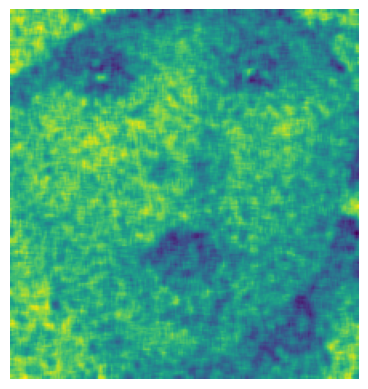

In [2]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
from PIL import Image

a = iio.imread('baby.jpeg', mode='F')  
k = np.ones((5,5))/25
b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('baby_mean_filter.png', b)
print(b)
plt.imshow(b)
plt.axis('off')
plt.show()

[[184 184 184 ... 163 162 154]
 [184 184 184 ... 162 157 155]
 [177 177 177 ... 160 157 155]
 ...
 [174 171 170 ... 138 135 133]
 [174 171 170 ... 138 135 133]
 [171 161 161 ... 138 138 131]]


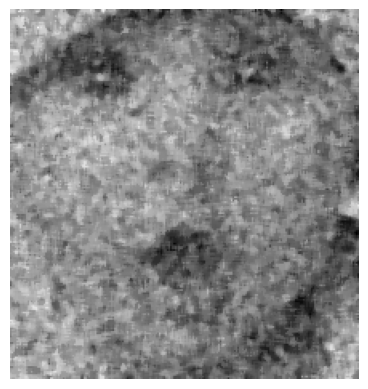

In [ ]:
import imageio.v2 as iio

a = iio.imread('baby.jpeg', mode='L')
b = sn.median_filter(a, size=5, mode='reflect')
iio.imsave('baby_median_filter.jpeg', b)
print(b)
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()

[[110 110 110 ...  77  77  77]
 [110 110 110 ...  77  77  77]
 [110 110 110 ...  77  77  77]
 ...
 [110 110 110 ...  48  48  48]
 [110 110 110 ...  48  48  48]
 [110 110 110 ...  50  50  50]]


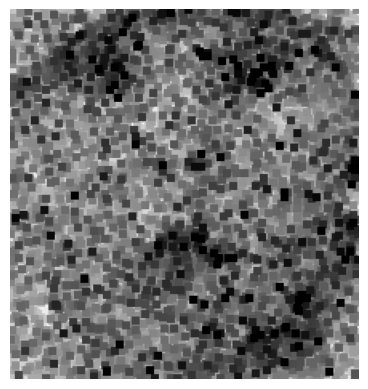

In [7]:

import imageio.v2 as iio
a = iio.imread('baby.jpeg', mode='L')  
b = sn.minimum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)
iio.imsave('baby_min_filter.jpeg', b)
print(b)
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
import cv2
import os
input_folder = 'exercise'
output_folder = 'exercise_Bai7'
os.makedirs(output_folder, exist_ok=True)
for fname in os.listdir(input_folder):
    input_path = os.path.join(input_folder, fname)
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    denoised = cv2.medianBlur(img, 5)
    edges = cv2.Canny(denoised, 100, 200)
    output_path = os.path.join(output_folder, f"edge_{fname}")
    cv2.imwrite(output_path, edges)   

In [ ]:
import cv2
import os
import numpy as np
import random
input_folder = 'Exercise'
output_folder = 'Exercise_bai8'
os.makedirs(output_folder, exist_ok=True)
for fname in os.listdir(input_folder):
    input_path = os.path.join(input_folder, fname)
    img = cv2.imread(input_path)
    if img is None:
        continue
    denoised = cv2.medianBlur(img, 5)
    b_scale = random.uniform(0.5, 1.5)
    g_scale = random.uniform(0.5, 1.5)
    r_scale = random.uniform(0.5, 1.5)
    b, g, r = cv2.split(denoised)
    b = np.clip(b * b_scale, 0, 255).astype(np.uint8)
    g = np.clip(g * g_scale, 0, 255).astype(np.uint8)
    r = np.clip(r * r_scale, 0, 255).astype(np.uint8)
    color_shifted = cv2.merge([b, g, r])
    output_path = os.path.join(output_folder, f"rgb_{fname}")
    cv2.imwrite(output_path, color_shifted)

In [ ]:
import cv2
import os
import numpy as np
import random
input_folder = 'Exercise'
output_folder = 'Exercise_bai9'
os.makedirs(output_folder, exist_ok=True)
used_hue_shifts = set()
def get_unique_hue_shift():
    while True:
        shift = random.randint(0, 179)
        if shift not in used_hue_shifts:
            used_hue_shifts.add(shift)
            return shift
for fname in os.listdir(input_folder):
    input_path = os.path.join(input_folder, fname)
    img = cv2.imread(input_path)
    if img is None:
        continue
    denoised = cv2.medianBlur(img, 5)
    hsv = cv2.cvtColor(denoised, cv2.COLOR_BGR2HSV)
    shift = get_unique_hue_shift()
    hsv[:, :, 0] = (hsv[:, :, 0] + shift) % 180
    hsv_shifted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    output_path = os.path.join(output_folder, f"hsv_{fname}")
    cv2.imwrite(output_path, hsv_shifted)